In [26]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(reshape2)
library(reshape2)
library(ggpubr)

In [3]:
loaded_seurat_object <- readRDS("/data2/ZenNa/DFU_Project/Result/Human_cca.merged.obj.rds")

In [8]:
head(loaded_seurat_object)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample,integrated_snn_res.0.2,seurat_clusters,major_group
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<fct>,<chr>
AAACCTGAGGCAGGTT_1,GSM5050523_DFU- healer,2224,1016,4.181655,DFU- healer,0,0,DFU- healer
AAACCTGAGGGAACGG_1,GSM5050523_DFU- healer,3218,1460,5.189559,DFU- healer,4,4,DFU- healer
AAACCTGAGGTGATTA_1,GSM5050523_DFU- healer,1785,966,4.537815,DFU- healer,1,1,DFU- healer
AAACCTGAGTTAACGA_1,GSM5050523_DFU- healer,2545,1367,3.536346,DFU- healer,0,0,DFU- healer
AAACCTGCATGTTGAC_1,GSM5050523_DFU- healer,2019,972,4.061417,DFU- healer,1,1,DFU- healer
AAACCTGGTGACTCAT_1,GSM5050523_DFU- healer,3253,1342,2.981863,DFU- healer,0,0,DFU- healer
AAACCTGGTTCAGTAC_1,GSM5050523_DFU- healer,3456,1080,3.559028,DFU- healer,5,5,DFU- healer
AAACCTGTCCGCATAA_1,GSM5050523_DFU- healer,6744,2205,3.825623,DFU- healer,1,1,DFU- healer
AAACCTGTCGGAAACG_1,GSM5050523_DFU- healer,3763,1510,2.870050,DFU- healer,1,1,DFU- healer


In [11]:
# Assuming your Seurat object is named 'Human_cca.merged.obj'
# Subset to include only DFU-Healer cells
DFU_Healer_obj <- loaded_seurat_object[, loaded_seurat_object$major_group == "DFU- healer"]


In [60]:
head(DFU_Healer_obj)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample,integrated_snn_res.0.2,seurat_clusters,major_group
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<fct>,<chr>
AAACCTGAGGCAGGTT_1,GSM5050523_DFU- healer,2224,1016,4.181655,DFU- healer,0,0,DFU- healer
AAACCTGAGGGAACGG_1,GSM5050523_DFU- healer,3218,1460,5.189559,DFU- healer,4,4,DFU- healer
AAACCTGAGGTGATTA_1,GSM5050523_DFU- healer,1785,966,4.537815,DFU- healer,1,1,DFU- healer
AAACCTGAGTTAACGA_1,GSM5050523_DFU- healer,2545,1367,3.536346,DFU- healer,0,0,DFU- healer
AAACCTGCATGTTGAC_1,GSM5050523_DFU- healer,2019,972,4.061417,DFU- healer,1,1,DFU- healer
AAACCTGGTGACTCAT_1,GSM5050523_DFU- healer,3253,1342,2.981863,DFU- healer,0,0,DFU- healer
AAACCTGGTTCAGTAC_1,GSM5050523_DFU- healer,3456,1080,3.559028,DFU- healer,5,5,DFU- healer
AAACCTGTCCGCATAA_1,GSM5050523_DFU- healer,6744,2205,3.825623,DFU- healer,1,1,DFU- healer
AAACCTGTCGGAAACG_1,GSM5050523_DFU- healer,3763,1510,2.870050,DFU- healer,1,1,DFU- healer


In [13]:
Fibroblast_Macrophage <- FindMarkers(DFU_Healer_obj,ident.1="1",idents.2="5",logfc.threshold = 0.25, min.pct = 0.1) #cell interesting


In [14]:
Fibroblast_Macrophage

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HLA-DRA,0,-3.7488132,0.421,0.688,0
PTGDS,0,2.3555777,0.858,0.507,0
COMP,0,3.9469843,0.943,0.674,0
CXCL14,0,2.1740212,0.889,0.716,0
CD74,0,-4.2005932,0.474,0.780,0
SFRP4,0,1.9106193,0.702,0.561,0
HLA-DRB1,0,-3.2989822,0.349,0.692,0
SFRP2,0,2.1586482,0.817,0.503,0
COL1A1,0,4.4013658,1.000,0.950,0


In [15]:
output_file <- "/data2/ZenNa/DFU_Project/Result/Healer_Fibroblast_Macrophage.csv"
write.csv(Fibroblast_Macrophage, file = output_file, row.names = TRUE)

In [16]:
input_file <- "/data2/ZenNa/DFU_Project/Result/Healer_Fibroblast_Macrophage.csv"
Healer_FM <- read.table(input_file, header=TRUE, sep = ",", row.names = 1)

In [19]:
nrDEG= Healer_FM 

In [23]:
attach(nrDEG)

In [24]:
df=nrDEG

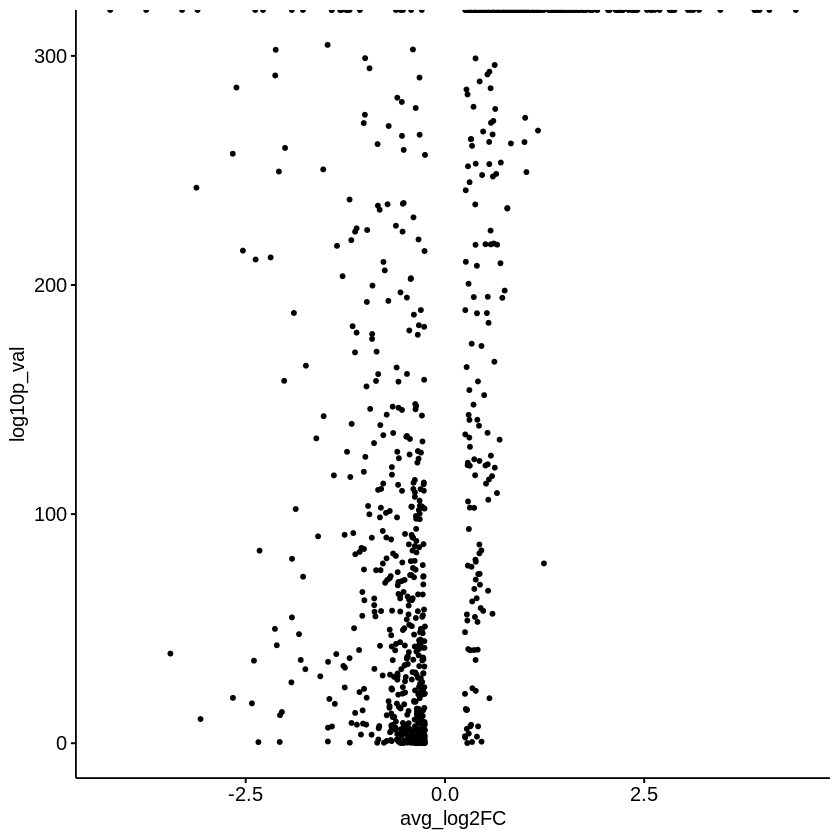

In [27]:
df$log10p_val= -log10(p_val) 
ggscatter(df, x = "avg_log2FC", y = "log10p_val",size=1.0)
df$g=ifelse(df$p_val>0.01,'stable', 
            ifelse( df$avg_log2FC >1,'up', 
                    ifelse( df$avg_log2FC < -1,'down','stable') )
)

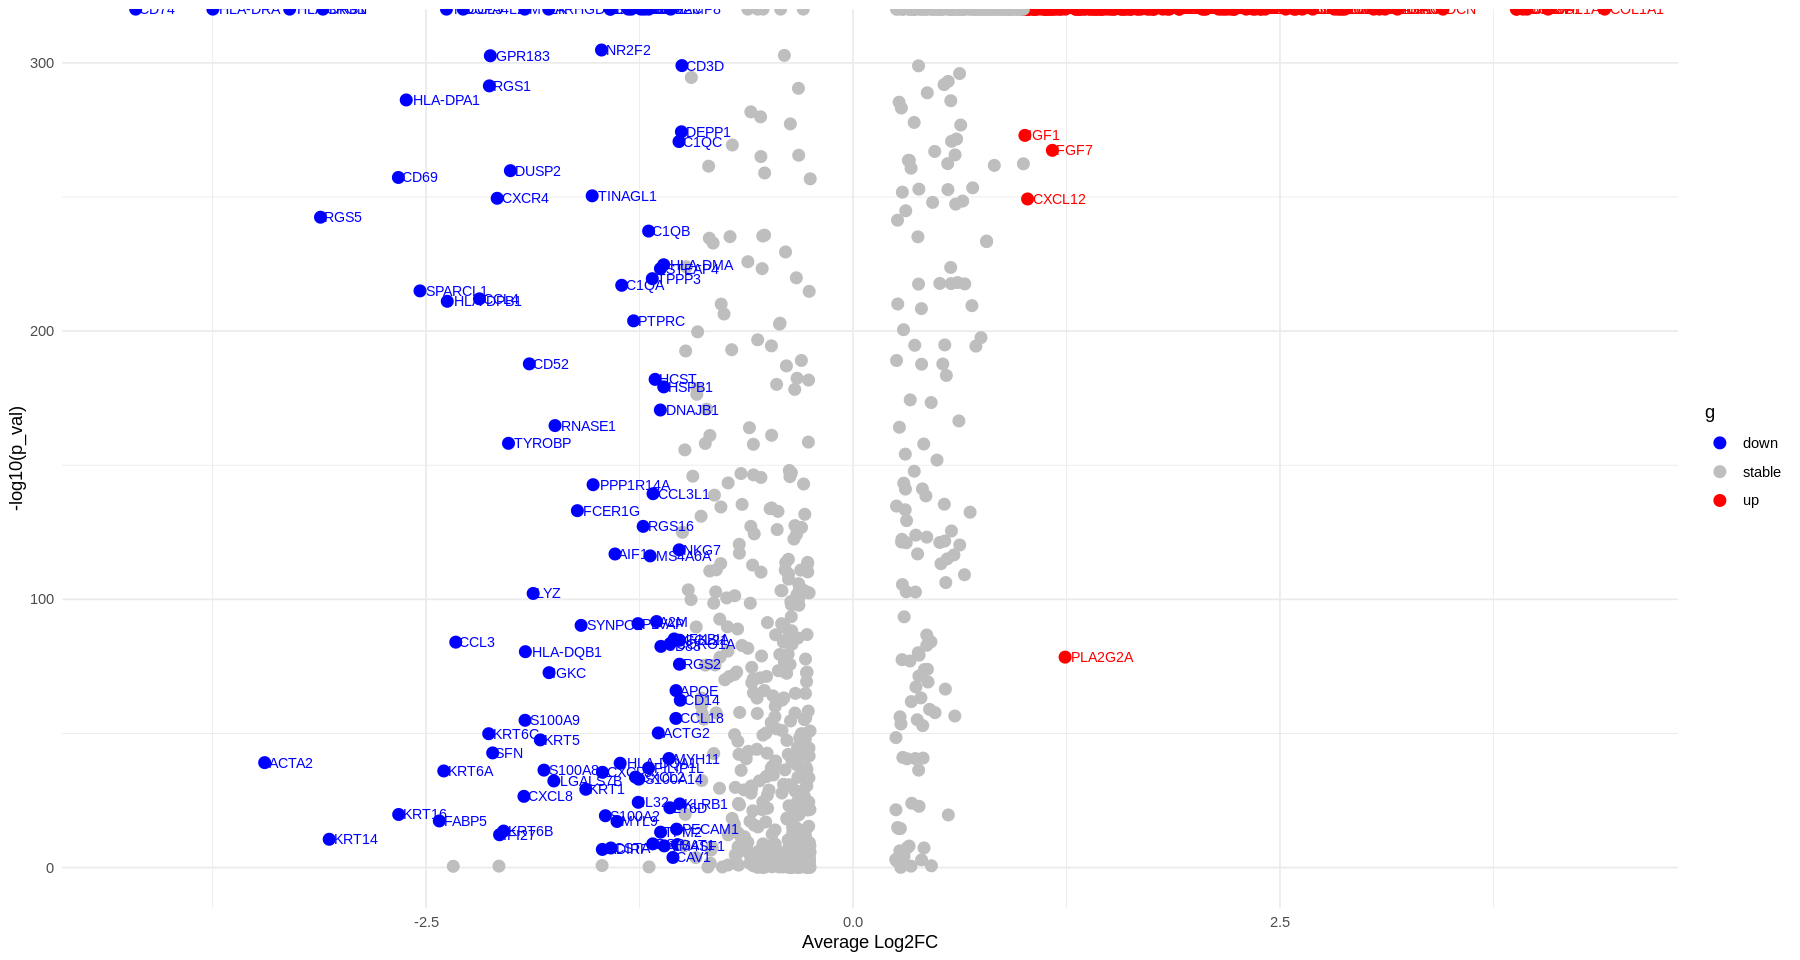

In [33]:
# Calculate the negative logarithm (base 10) of 'p_val' and store it in 'log10p_val'
df$log10p_val <- -log10(df$p_val)

# Define a new column 'g' based on conditions
df$g <- ifelse(df$p_val > 0.01, 'stable', 
               ifelse(df$avg_log2FC > 1, 'up', 
                      ifelse(df$avg_log2FC < -1, 'down', 'stable')))

# Load the ggplot2 library if it's not already installed
# install.packages("ggplot2")
library(ggplot2)

# Create a scatter plot using ggplot
scatter_plot <- ggplot(df, aes(x = avg_log2FC, y = log10p_val, color = g)) +
  geom_point(size = 3) +  # Increase the point size
  labs(x = "Average Log2FC", y = "-log10(p_val)") +
  scale_color_manual(values = c('stable' = 'gray', 'up' = 'red', 'down' = 'blue')) +
  theme_minimal()

# Add labels only for upregulated and downregulated genes
scatter_plot <- scatter_plot +
  geom_text(data = subset(df, g %in% c('up', 'down')), aes(label = rownames(subset(df, g %in% c('up', 'down')))),
            hjust = -0.1, vjust = 0.5, size = 3)

# Print the scatter plot
options(repr.plot.width = 15, repr.plot.height = 8)

print(scatter_plot)

In [35]:
df$name=rownames(df)
head(df)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,log10p_val,g,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HLA-DRA,0,-3.748813,0.421,0.688,0,Inf,down,HLA-DRA
PTGDS,0,2.355578,0.858,0.507,0,Inf,up,PTGDS
COMP,0,3.946984,0.943,0.674,0,Inf,up,COMP
CXCL14,0,2.174021,0.889,0.716,0,Inf,up,CXCL14
CD74,0,-4.200593,0.474,0.780,0,Inf,down,CD74
SFRP4,0,1.910619,0.702,0.561,0,Inf,up,SFRP4


In [36]:
write.csv(df, file = "/data2/ZenNa/DFU_Project/Result/Healer_Fibro_Mac_DF.csv", row.names = TRUE, quote = TRUE)

In [65]:
df

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,log10p_val,g,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HLA-DRA,0,-3.7488132,0.421,0.688,0,Inf,down,HLA-DRA
PTGDS,0,2.3555777,0.858,0.507,0,Inf,up,PTGDS
COMP,0,3.9469843,0.943,0.674,0,Inf,up,COMP
CXCL14,0,2.1740212,0.889,0.716,0,Inf,up,CXCL14
CD74,0,-4.2005932,0.474,0.780,0,Inf,down,CD74
SFRP4,0,1.9106193,0.702,0.561,0,Inf,up,SFRP4
HLA-DRB1,0,-3.2989822,0.349,0.692,0,Inf,down,HLA-DRB1
SFRP2,0,2.1586482,0.817,0.503,0,Inf,up,SFRP2
COL1A1,0,4.4013658,1.000,0.950,0,Inf,up,COL1A1


In [68]:
matrix_data <- as.matrix(df)

In [69]:
# Assuming 'gene_expr_matrix' is your gene expression matrix with samples as columns and genes as rows
gene_expr_matrix <- matrix_data


In [71]:
# Assuming 'upregulated_genes' and 'downregulated_genes' are lists of gene symbols or IDs
upregulated_genes <- c('PTGDS',
 'COMP',
 'CXCL14',
 'SFRP4',
 'SFRP2',
 'COL1A1',
 'CFD',
 'APOD',
 'COL1A2',
 'POSTN',
 'COL3A1',
 'SFRP1',
 'MFAP5',
 'DIO2',
 'MMP2',
 'DCN',
 'LUM',
 'CTGF',
 'APCDD1',
 'TNFAIP6',
 'SERPINE2',
 'IGFBP2',
 'INHBA',
 'ELN',
 'DPT',
 'FBLN1',
 'TNC',
 'ADM',
 'FN1',
 'VCAN',
 'CTHRC1',
 'WNT5A',
 'COL12A1',
 'CTSK',
 'MFAP4',
 'ASPN',
 'COL6A3',
 'CRABP2',
 'FBN1',
 'CCDC80',
 'FBLN2',
 'MEG3',
 'HTRA3',
 'MMP11',
 'GAS1',
 'TWIST2',
 'RARRES2',
 'SPARC',
 'ACKR4',
 'COL11A1',
 'IGFBP4',
 'THBS2',
 'COL6A1',
 'COL6A2',
 'SPON2',
 'FNDC1',
 'PDGFRA',
 'PDPN',
 'SERPINF1',
 'COL5A1',
 'OLFML3',
 'PDGFRL',
 'TGFBI',
 'MXRA5',
 'PCOLCE',
 'COL5A2',
 'STEAP1',
 'C1S',
 'PAM',
 'CTSB',
 'RGS3',
 'LGALS1',
 'EMP1',
 'MDK',
 'C1R',
 'LOX',
 'BGN',
 'PMEPA1',
 'AEBP1',
 'NNMT',
 'TMEM45A',
 'MXRA8',
 'HTRA1',
 'ANGPTL2',
 'BICC1',
 'SPON1',
 'COL16A1',
 'ISLR',
 'HMCN1',
 'NBL1',
 'MRC2',
 'ADAM12',
 'MMP14',
 'PTK7',
 'GPNMB',
 'LRP1',
 'FAP',
 'FMOD',
 'CDH11',
 'FSTL1',
 'CLMP',
 'S100A13',
 'ADAMTS2',
 'ECM1',
 'PLXDC2',
 'CLEC11A',
 'MFAP2',
 'MRPS6',
 'PPIC',
 'CERCAM',
 'RCN3',
 'TIMP2',
 'ANTXR1',
 'DPYSL3',
 'IGF1',
 'FGF7',
 'CXCL12',
 'PLA2G2A')  # Replace with your actual upregulated genes
downregulated_genes <- c('HLA-DRA',
 'CD74',
 'HLA-DRB1',
 'CCL5',
 'SRGN',
 'NDUFA4L2',
 'MYLK',
 'LAPTM5',
 'HOPX',
 'BTG2',
 'VAMP8',
 'ARHGDIB',
 'BST2',
 'MEF2C',
 'CRIP1',
 'BTG1',
 'NR2F2',
 'GPR183',
 'CD3D',
 'RGS1',
 'HLA-DPA1',
 'DEPP1',
 'C1QC',
 'DUSP2',
 'CD69',
 'TINAGL1',
 'CXCR4',
 'RGS5',
 'C1QB',
 'HLA-DMA',
 'STEAP4',
 'TPPP3',
 'C1QA',
 'SPARCL1',
 'CCL4',
 'HLA-DPB1',
 'PTPRC',
 'CD52',
 'HCST',
 'HSPB1',
 'DNAJB1',
 'RNASE1',
 'TYROBP',
 'PPP1R14A',
 'CCL3L1',
 'FCER1G',
 'RGS16',
 'NKG7',
 'AIF1',
 'MS4A6A',
 'LYZ',
 'A2M',
 'PLVAP',
 'SYNPO2',
 'NFKBIA',
 'CCL21',
 'CCL3',
 'CORO1A',
 'CD83',
 'HLA-DQB1',
 'RGS2',
 'IGKC',
 'APOE',
 'CD14',
 'CCL18',
 'S100A9',
 'ACTG2',
 'KRT6C',
 'KRT5',
 'SFN',
 'MYH11',
 'ACTA2',
 'HLA-DQA1',
 'FILIP1L',
 'S100A8',
 'KRT6A',
 'CXCL3',
 'CXCL2',
 'S100A14',
 'LGALS7B',
 'KRT1',
 'CXCL8',
 'IL32',
 'KLRB1',
 'LY6D',
 'KRT16',
 'S100A2',
 'FABP5',
 'MYL9',
 'PECAM1',
 'KRT6B',
 'TPM2',
 'IFI27',
 'KRT14',
 'DSP',
 'SAT1',
 'TM4SF1',
 'CSTA',
 'ADIRF',
 'CAV1')  # Replace with your actual downregulated genes

In [72]:
 #Subset the expression matrix to include only the significant genes
selected_genes <- c(upregulated_genes, downregulated_genes)
selected_expr_matrix <- gene_expr_matrix[row.names(gene_expr_matrix) %in% selected_genes, ]

In [79]:
selected_expr_matrix 

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,log10p_val,g,name
HLA-DRA,0.000000e+00,-3.7488132,0.421,0.688,0.000000e+00,Inf,down,HLA-DRA
PTGDS,0.000000e+00,2.3555777,0.858,0.507,0.000000e+00,Inf,up,PTGDS
COMP,0.000000e+00,3.9469843,0.943,0.674,0.000000e+00,Inf,up,COMP
CXCL14,0.000000e+00,2.1740212,0.889,0.716,0.000000e+00,Inf,up,CXCL14
CD74,0.000000e+00,-4.2005932,0.474,0.780,0.000000e+00,Inf,down,CD74
SFRP4,0.000000e+00,1.9106193,0.702,0.561,0.000000e+00,Inf,up,SFRP4
HLA-DRB1,0.000000e+00,-3.2989822,0.349,0.692,0.000000e+00,Inf,down,HLA-DRB1
SFRP2,0.000000e+00,2.1586482,0.817,0.503,0.000000e+00,Inf,up,SFRP2
COL1A1,0.000000e+00,4.4013658,1.000,0.950,0.000000e+00,Inf,up,COL1A1
CFD,0.000000e+00,2.2300527,0.868,0.637,0.000000e+00,Inf,up,CFD


In [74]:
library(pheatmap)